# LSTM Model Training
Below we will train a LSTM network using the training data and validate it using the validation set.

## Set enviroment

In [ ]:
# %pip install tensorflow pandas numpy matplotlib seaborn scikit-learn

        ▄▀▀▄              
      ▄▀▀▀▀▀▀▄            
      ▀▀▀▀▀▀▀▀      ▄▄▄   
     ▄▀▀▀▀▀▀▀▀▄  ▄▀▀▀▀▀▀▀▄
▄▀▀▄ ▀▀▀▀▀▀▀▀▀▀ ▄▀▀▀▀▀▀▀▀▀
▀▀▀▀▄▄▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀ 
  ▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀  
   ▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀   
         ▀▀▀▀▀▀▀▀▀▀       
        ▀▀▀▀▀▀▀▀▀▀▀       
              ▀▀▀▀▀       
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.3-cp38-abi3-manylinux2014_x86_64.whl.metadata (592 bytes)
  Using cached requests-2.32.3-py3-none-any.whl.meta

In [21]:
# Import necessary libraries for data handling, preprocessing, and modeling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# For text preprocessing and tokenization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# For building the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Input

# For model evaluation
from sklearn.metrics import classification_report, confusion_matrix

## Load Data

In [5]:
import os
print(os.getcwd())

/home/xgen0/University/3/NaturalLanguageProcessing/sesion9


In [6]:
# Load DATA
train_df = pd.read_csv('./data/sent_train.csv')
test_df = pd.read_csv('./data/sent_valid.csv')

In [11]:
# Explore the data: check for null values, data distribution, etc.
print(train_df.columns)

print(train_df.head())
print(train_df['label'].value_counts())

Index(['text', 'label'], dtype='object')
                                                text  label
0  $BYND - JPMorgan reels in expectations on Beyo...      0
1  $CCL $RCL - Nomura points to bookings weakness...      0
2  $CX - Cemex cut at Credit Suisse, J.P. Morgan ...      0
3  $ESS: BTIG Research cuts to Neutral https://t....      0
4  $FNKO - Funko slides after Piper Jaffray PT cu...      0
label
2    6178
1    1923
0    1442
Name: count, dtype: int64


## Preprocessing

In [14]:
# Preprocess the text data
def clean_text(text):
    text = text.lower()  # convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove punctuation
    return text

train_df['clean_text'] = train_df['text'].apply(clean_text)
test_df['clean_text'] = test_df['text'].apply(clean_text)

print(train_df['clean_text'].head())

0    bynd  jpmorgan reels in expectations on beyond...
1    ccl rcl  nomura points to bookings weakness at...
2    cx  cemex cut at credit suisse jp morgan on we...
3    ess btig research cuts to neutral httpstcomcyf...
4    fnko  funko slides after piper jaffray pt cut ...
Name: clean_text, dtype: object


## Tokenization

In [16]:
# Set hyperparameters for tokenization and padding
max_vocab = 5000  # maximum number of words to consider
max_length = 50   # maximum length of a tweet in terms of word count

# Tokenize the text
tokenizer = Tokenizer(num_words=max_vocab, oov_token='<OOV>')
tokenizer.fit_on_texts(train_df['clean_text'])

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_df['clean_text'])
valid_sequences = tokenizer.texts_to_sequences(test_df['clean_text'])

# Pad sequences to ensure uniform length
X_train = pad_sequences(train_sequences, maxlen=max_length, padding='post')
X_valid = pad_sequences(valid_sequences, maxlen=max_length, padding='post')

# Prepare target labels
y_train = pd.get_dummies(train_df['label']).values
y_valid = pd.get_dummies(test_df['label']).values

The tokenizer converts words to integers, and padding ensures each sequence is of uniform length.

## LSTM Model

In [22]:
# Define model hyperparameters
embedding_dim = 64
lstm_units = 64

model = Sequential([
    Input(shape=(max_length,)),
    Embedding(input_dim=max_vocab, output_dim=embedding_dim),
    LSTM(lstm_units, dropout=0.2, recurrent_dropout=0.2),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 clases: Bearish, Bullish, Neutral
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 50, 64)         │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,203 (1.35 MB)

 Trainable params: 355,203 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

The network starts with an embedding layer, followed by an LSTM to capture sequential dependencies, and ends with dense layers to output probabilities over the 3 sentiment classes.

In [24]:
# Train the model with validation
model.fit(
    X_train, y_train,
    epochs=100,  # adjust epochs as necessary
    batch_size=64,
    validation_data=(X_valid, y_valid)
)

Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.6459 - loss: 0.8952 - val_accuracy: 0.6558 - val_loss: 0.8786
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.6502 - loss: 0.8894 - val_accuracy: 0.6558 - val_loss: 0.8795
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.6496 - loss: 0.8898 - val_accuracy: 0.6558 - val_loss: 0.8800
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.6364 - loss: 0.9055 - val_accuracy: 0.6558 - val_loss: 0.8788
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.6544 - loss: 0.8851 - val_accuracy: 0.6558 - val_loss: 0.8783
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.6482 - loss: 0.8912 - val_accuracy: 0.6558 - val_loss: 0.8790
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.6481 - loss: 0.8904 - val_accuracy: 0.6558 - val_loss: 0.8785
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.6518 - loss: 0.8844 - 

## Evaluate Model

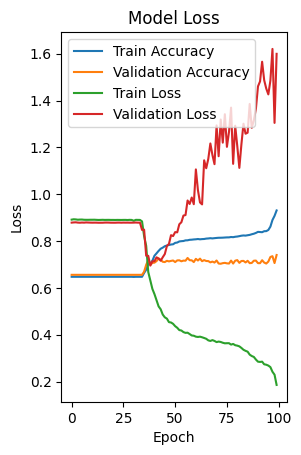

Validation Loss: 1.5993, Validation Accuracy: 0.7404
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
              precision    recall  f1-score   support

     Bearish       0.40      0.56      0.47       347
     Bullish       0.68      0.53      0.59       475
     Neutral       0.86      0.84      0.85      1566

    accuracy                           0.74      2388
   macro avg       0.65      0.65      0.64      2388
weighted avg       0.76      0.74      0.75      2388



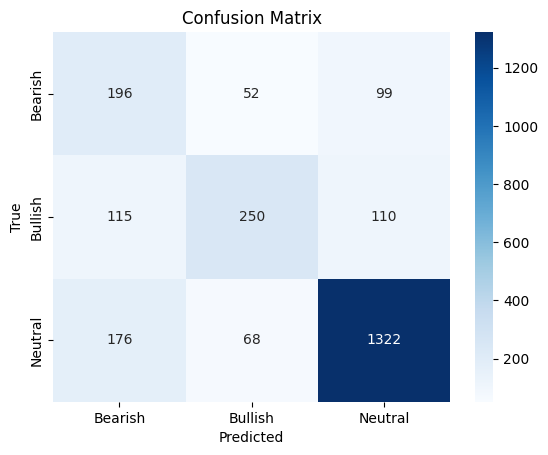

In [27]:

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(model.history.history['accuracy'], label='Train Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate on validation set
val_loss, val_accuracy = model.evaluate(X_valid, y_valid, verbose=0)
print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

# Generate predictions and print classification report
y_pred = model.predict(X_valid)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_valid, axis=1)

print(classification_report(y_true_labels, y_pred_labels, target_names=['Bearish', 'Bullish', 'Neutral']))

# Optional: Display confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bearish', 'Bullish', 'Neutral'], yticklabels=['Bearish', 'Bullish', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()